#                            Heart Disease Prediction

[](https://www.google.com/imgres?imgurl=https%3A%2F%2Fimages.ctfassets.net%2Fyixw23k2v6vo%2F6BezXYKnMqcG4LSEcWyXlt%2Fb490656e99f34bc18999f3563470eae6%2FiStock-1156928054.jpg%3Fw%3D802%26fm%3Djpg%26fit%3Dthumb%26q%3D65%26fl%3Dprogressive&imgrefurl=https%3A%2F%2Fwww.healthcentral.com%2Farticle%2Fcovid-19-dangerous-heart-disease&tbnid=FdkQRbtTfOzDIM&vet=12ahUKEwi44Oy1kcjqAhVID7cAHV8JBIAQMygHegUIARDbAQ..i&docid=5SLrZ_n3DML6cM&w=802&h=535&q=heart%20disease&ved=2ahUKEwi44Oy1kcjqAhVID7cAHV8JBIAQMygHegUIARDbAQ)
Heart disease describes a range of conditions that affect your heart. Diseases under the heart disease umbrella include blood vessel diseases, such as coronary artery disease; heart rhythm problems (arrhythmias); and heart defects you're born with (congenital heart defects), among others.

The term "heart disease" is often used interchangeably with the term "cardiovascular disease." Cardiovascular disease generally refers to conditions that involve narrowed or blocked blood vessels that can lead to a heart attack, chest pain (angina) or stroke. Other heart conditions, such as those that affect your heart's muscle, valves or rhythm, also are considered forms of heart disease

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-uci/heart.csv


In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.utils import shuffle

In [3]:
dataset=pd.read_csv('/kaggle/input/heart-disease-uci/heart.csv')
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Intro to DataSet
As we can see here there are 14 columns in this dataset having different feature.
- Independent Feature:
Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
- Dependent Feature:
target


In [4]:
dataset.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**As we can see that it is very hard to understand columns which are in abbrv. form  so lets sort out the columns name to get better understanding of it**
*what every columns mean*
- cp : Cerebral palsy (CP)
- trestbps : Resting blood Pressure
- chol : cholestrol level
- fbs : Fasting blood sugar
- restecg : resting electrocardiographic.
- thalach : maximum heart rate acheived
- exang : exercise induced angina(exang)
- oldpeak : ST depression induced by exercise relative to rest.
- slope : heart rate slope 
- ca : coronary artery
- thal : thallesimea




# **Exploratory Data Analysis**

In [5]:
# now check the shape of data set
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


From the above code we can see the dataset information which contains mainly 303 **Rows** and 14 **columns**.
- It can also be analyzed that all the 14 columns are numerical value in the dataset out of which *target* is dependent columns. Now it will be easier for us to perform furthur exploration

In [6]:
# lets describe the dataset

print('Unique value available in columns:')
print('SEX has',dataset['sex'].unique())
print('CP has',dataset['cp'].unique())
print('Fbs has',dataset['fbs'].unique())
print('EXANG has',dataset['exang'].unique())
print('Slope has',dataset['slope'].unique())
print('ca has',dataset['ca'].unique())
print('thal has',dataset['thal'].unique())
print('target has',dataset['target'].unique())
print('\t')
print(dataset.describe().T)

Unique value available in columns:
SEX has [1 0]
CP has [3 2 1 0]
Fbs has [1 0]
EXANG has [0 1]
Slope has [0 2 1]
ca has [0 2 1 3 4]
thal has [1 2 3 0]
target has [1 0]
	
          count        mean        std    min    25%    50%    75%    max
age       303.0   54.366337   9.082101   29.0   47.5   55.0   61.0   77.0
sex       303.0    0.683168   0.466011    0.0    0.0    1.0    1.0    1.0
cp        303.0    0.966997   1.032052    0.0    0.0    1.0    2.0    3.0
trestbps  303.0  131.623762  17.538143   94.0  120.0  130.0  140.0  200.0
chol      303.0  246.264026  51.830751  126.0  211.0  240.0  274.5  564.0
fbs       303.0    0.148515   0.356198    0.0    0.0    0.0    0.0    1.0
restecg   303.0    0.528053   0.525860    0.0    0.0    1.0    1.0    2.0
thalach   303.0  149.646865  22.905161   71.0  133.5  153.0  166.0  202.0
exang     303.0    0.326733   0.469794    0.0    0.0    0.0    1.0    1.0
oldpeak   303.0    1.039604   1.161075    0.0    0.0    0.8    1.6    6.2
slope     303.0

- Age has mean of 54 years, minimum age is **29** and maximum **77**
- trestbps has mean of 131, minimum  is **94** and maximum **200**
- thal has mean of 2.31, minimum age is **0** and maximum **3**

**Lets Check for any Null value in dataset**

In [7]:
dataset.isnull().any()


age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

As there are no null values associated with any columns
**Now we will see the distribution of our data**
- age
- sex
- target

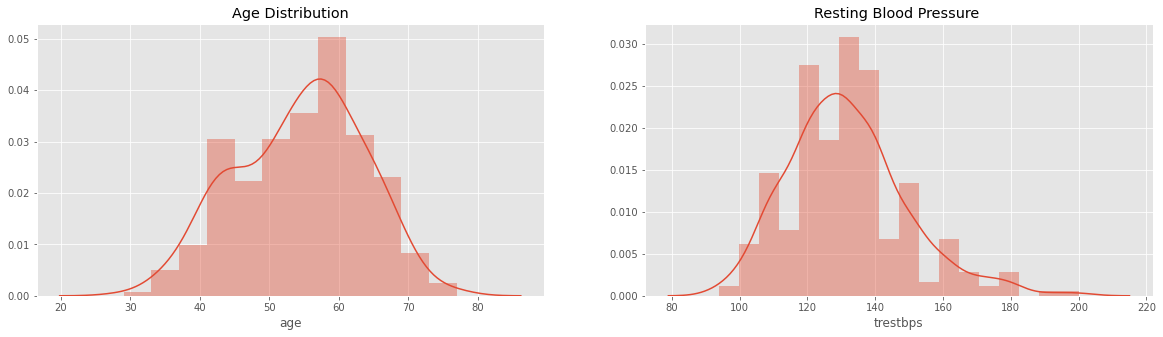

In [8]:
plt.style.use('ggplot')
fig,ax=plt.subplots(1,2,figsize=(20,5))
ax[0].set_title('Age Distribution')
ax[1].set_title('Resting Blood Pressure ')
sns.distplot(dataset['age'],ax=ax[0])
sns.distplot(dataset['trestbps'],ax=ax[1])

From this, We can observe the following things:
- That mostly people are from the above 40 age and less than 70 years old.
- Most have blood pressure in bw 120 to 140.

##### Lets analyze about the target distribution

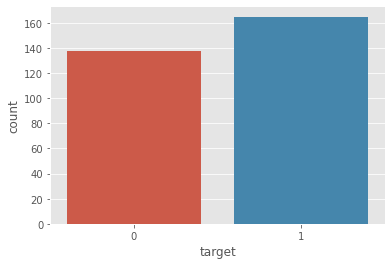

In [9]:
plt.style.use('ggplot')
plt.figure(figsize=(6,4))
sns.countplot(dataset['target'])

We can see that it has:
- There are approx 140 people not having heart disease
- There are approx 170 people having heart disease 

So we can say that our dataset is perfectly balanced and equilly distributed

#### We are done with EDA now lets focus on further process.

# Feature Selection

Now we will look for correlation of different feature.

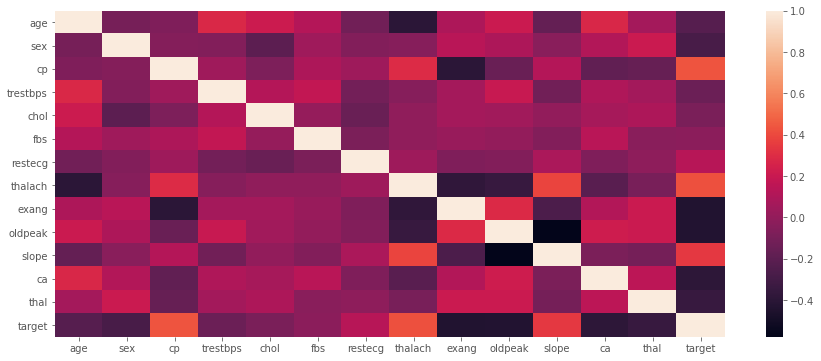

In [10]:
corr_matrix=dataset.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr_matrix)

It looks like every feature is important for us.
before doing model selection we have to shuffle our dataset as there are data splited to 0 and 1.

In [11]:
print(dataset.head(2))
print(dataset.tail(2))

dataset=shuffle(dataset)

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
301      1   1     3       0  
302      1   1     2       0  


Now our dataset is randomly shuffeled and it will be better to use randomized sample.

In [12]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2,1
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2,1
70,54,1,2,120,258,0,0,147,0,0.4,1,0,3,1
201,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2,1


now splitting independent variable and dependent variable into different dataframe

In [13]:
x_dataset=dataset.drop('target',axis=1)
y_dataset=dataset['target']
print(x_dataset.shape,y_dataset.shape)

(303, 13) (303,)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# transform data
x_dataset = scaler.fit_transform(x_dataset)
print(x_dataset)

[[0.10416667 0.         0.33333333 ... 1.         0.         0.66666667]
 [0.6875     0.         0.         ... 1.         0.         0.66666667]
 [0.52083333 1.         0.66666667 ... 0.5        0.         1.        ]
 ...
 [0.47916667 1.         1.         ... 0.5        0.         0.33333333]
 [0.4375     0.         0.66666667 ... 0.5        0.         0.66666667]
 [0.60416667 1.         0.66666667 ... 0.5        0.         1.        ]]


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV


Now everything is good lets divide our dataset into train and test set.

In [16]:
#splitting trainx,test_x,train_y,tets_y of size 20 percent
X_train,X_test,y_train,y_test=train_test_split(x_dataset,y_dataset,test_size=0.2,random_state=0)
print(X_train.shape,y_train.shape)# validating shape

(242, 13) (242,)


# Model Selection

Now we are ready for model selection. It is hard to say that any one **GOD** algorithm performs well in every scenario. Every Model performs differently  on different dataset it is upto us to analyze which model perform better in this kind of scenario. There is no **GOD** algorithm or say algorithm which fits perfectly on every dataset.
For model selection we have to analyze scores or accuracy of different algorithm and find one which best fits our modela and thus satisfy our problem. Let's say for this kind of dataset where we are predicting the heart disease of a person it is thus important for us to get maximum precision score.
we have to focus on decreasing **FALSE POSITIVE RATE (FPR)** = **false positive(FP)**/**false positive + True negative(TN)**

There are certain classification algorithm which we will analyze for our model:
- KNNclassifier
- SVMclassifier
- RandomForest
- Xgboost
- logistics regression

In [17]:
model1=KNeighborsClassifier()
model2= SVC()
model3= XGBClassifier()
model4= RandomForestClassifier()
model5= LogisticRegression()
models=[model1,model2,model3,model4,model5]

In [18]:
for model in models:
    model.fit(X_train,y_train)
    print(model)
    print('score',model.score(X_test,y_test))
    y_pred=model.predict(X_test)
    print('F1-score=',f1_score(y_test,y_pred))

KNeighborsClassifier()
score 0.7377049180327869
F1-score= 0.7241379310344828
SVC()
score 0.6885245901639344
F1-score= 0.6885245901639345
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
score 0.7213114754098361
F1-score= 0.711864406779661
RandomForestClassifier()
score 0.7540983606557377
F1-score= 0.7457627118644067
LogisticRegression()
score 0.7049180327868853
F1-score= 0.7000000000000001


From the above cell, we can observe that our accuracy best fits with Random Forest classifiers at an score of 0.88 and f1_score of 0.89.
well this score is not that good but we can surely increase it by parameter tuning in the below cell.

In [19]:
# creating model as RandomizedSearchCV
model=RandomForestClassifier()

**Hyper parameter tuning**

There are two ways to tune parameters 
- Grid search Cv
- Randomized Search Cv

we will use Randomized search cv as it takes less time and check randomly for parameters.

In [20]:
# defining param grid
n_estimators = [100, 200, 300, 400, 500]
max_features = ['auto', 'sqrt']
max_depth = [5, 10, 20, 30, 40, 50]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
        
random_grid = {'n_estimators': n_estimators,
               'criterion':['gini','entropy'],
                       'max_features': max_features,
                       'max_depth': max_depth,
                       'min_samples_split': min_samples_split,
                       'min_samples_leaf': min_samples_leaf,
                       'bootstrap': bootstrap}

In [21]:
#randomSearch=RandomizedSearchCV(estimator =model, param_distributions = random_grid, cv = 10)
#randomSearch.fit(X_train,y_train)

In [22]:
# lets print the best param and best score of after tuning
#print('best_params',randomSearch.best_params_)
#print('best-score',randomSearch.best_score_)

In [23]:
model=RandomForestClassifier(n_estimators=500,min_samples_split=2,min_samples_leaf=4,max_features='sqrt',max_depth=10,bootstrap=False,criterion='gini')
model.fit(X_train,y_train)
print(model)
print('score',model.score(X_test,y_test))
y_pred=model.predict(X_test)
print('F1-score=',f1_score(y_test,y_pred))

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='sqrt',
                       min_samples_leaf=4, n_estimators=500)
score 0.7704918032786885
F1-score= 0.7666666666666667


In [24]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1])

In [25]:
import pickle
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(model, open(filename, 'wb'))